In [2]:
import torch
import os
from pyDOE import lhs
from utils import torchIWT
import numpy as np
import scipy.io as sio
import torch.nn as nn
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
def get_burgers_data(Burgers_file):
    data = sio.loadmat(Burgers_file)
    x, t, usol = data['x'], data['t'], data['usol']
    X, T = np.meshgrid(x, t)
    x_test_np = np.concatenate((np.hstack(T.T).reshape(-1, 1), 
                                np.hstack(X.T).reshape(-1, 1)), 
                                axis=1)
    x = torch.from_numpy(x).float().to(device)
    t = torch.from_numpy(t).float().to(device)
    x_test = torch.from_numpy(x_test_np).float().to(device)
    x_test_exact = torch.from_numpy(usol).float().reshape(-1, 1).to(device)
    return x, t, x_test, x_test_exact

In [5]:
def get_pinn_input_data(Nic, Nbc):
    x_init = torch.full([Nic, 1], -1) + torch.rand([Nic, 1]) * 2
    x_init_point = torch.cat((torch.zeros(Nic, 1), x_init), dim=1)
    x_init_label = -1 * torch.sin(np.pi * x_init_point[:, [1]])
    x_boundary_left_point = torch.cat((torch.rand([Nbc, 1]), torch.full([Nbc, 1], -1)), dim=1)
    x_boundary_right_point = torch.cat((torch.rand([Nbc, 1]), torch.ones([Nbc, 1])), dim=1)
    x_boundary_left_label = torch.zeros([Nbc, 1])
    x_boundary_right_label = torch.zeros([Nbc, 1])
    x_boundary_point = torch.cat((x_boundary_left_point, x_boundary_right_point), dim=0)
    x_boundary_label = torch.cat((x_boundary_left_label, x_boundary_right_label), dim=0)
    x_ic = x_init_point.to(device)
    u_ic = x_init_label.to(device)
    x_bc = x_boundary_point.to(device)
    u_bc = x_boundary_label.to(device)
    return x_ic, u_ic, x_bc, u_bc

In [6]:
def x_f_loss_fun(x, train_U):
    if not x.requires_grad:
        x = torch.autograd.Variable(x, requires_grad=True)
    u = train_U(x)
    d = torch.autograd.grad(outputs=u, inputs=x, grad_outputs=torch.ones_like(u), create_graph=True)  # d = [u_t, u_x]
    u_t = d[0][:, 0].unsqueeze(-1)
    u_x = d[0][:, 1].unsqueeze(-1)
    dd = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)  # dd = [u_xx]
    u_xx = dd[0][:, 1].unsqueeze(-1)
    f = u_t + u * u_x - (0.01 / np.pi) * u_xx
    return f

$$f = u_t + uu_x - (0.01/\pi)u_{xx}$$

# core of all code
class Model()
...


If you require the complete source code or have specific inquiries, please feel free to contact me via email at [w1858682345@163.com].
Thank you for your understanding and cooperation!

In [11]:
epoch = 5000

lb = np.array([0.0, -1.0])
ub = np.array([1.0, 1.0])

model = Model(...)

lr = [0.001, 0.001, 0.0003, 0.0001, 0.00003]
wlr = 0.001

j0 = 0
J = 5
e = 0.03

model.train(move_epoch=10, lr=lr, wlr=wlr, j0=j0, J=J, e=e)  # 10


number of moved point:400
network train epoch: 2499, loss: 0.20528264343738556
number of moved point:902
network train epoch: 4999, loss: 1.20181727409362826
OPTIM1 DONE
network train epoch: 7655, OPTIM2 LOSS:0.0006285092094913125
OPTIM2 DONE
Test_L2error: 3.51e-03
epoch:  1

number of moved point:971
network train epoch: 2499, loss: 2.212844133377075844
number of moved point:950
network train epoch: 4999, loss: 0.108564868569374086
OPTIM1 DONE
network train epoch: 2751, OPTIM2 LOSS:0.008062984794378287
OPTIM2 DONE
Test_L2error: 1.37e-03
epoch:  2

number of moved point:931
network train epoch: 2499, loss: 0.084252297878265385
number of moved point:954
network train epoch: 4999, loss: 0.16760486364364624
OPTIM1 DONE
network train epoch: 13, OPTIM2 LOSS:0.16755135357379913
OPTIM2 DONE
Test_L2error: 1.65e-03
epoch:  3

number of moved point:971
network train epoch: 2499, loss: 0.98637199401855474
number of moved point:975
network train epoch: 4999, loss: 0.9046539664268494
OPTIM1 DONE
n

In [12]:
x_test_pred = net(x_test_point)

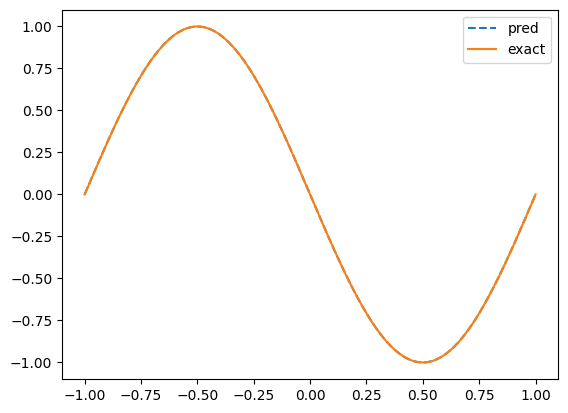

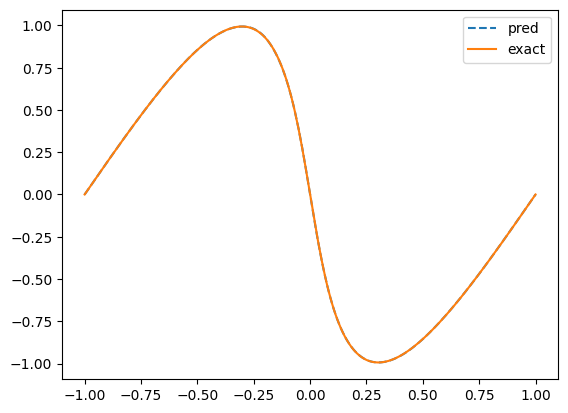

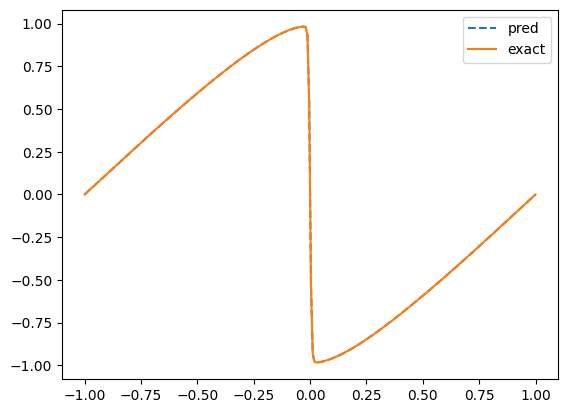

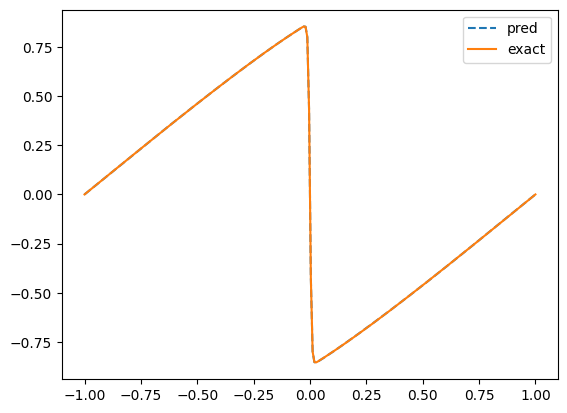

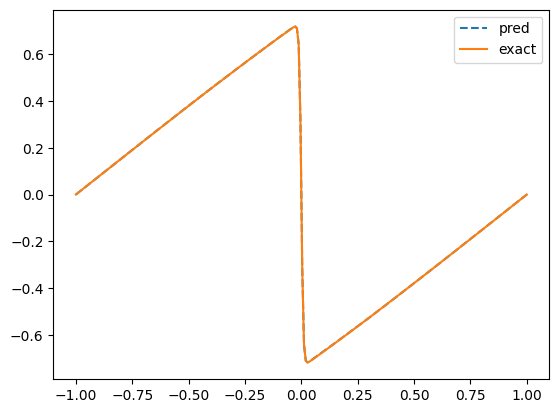

In [13]:
x_test_pred = net(x_test_point)
x_test_pred = x_test_pred.reshape(x.shape[0], t.shape[0])
x_test_pred = x_test_pred.to('cpu').detach().numpy()
x_test_exact = x_test_exact.reshape(x.shape[0], t.shape[0])
x_test_exact = x_test_exact.to('cpu').detach().numpy()
x = x.to('cpu').detach().numpy()
t = t.to('cpu').detach().numpy()
plt.figure()
plt.plot(x, x_test_pred[:, 0], label='pred', linestyle='--')
plt.plot(x, x_test_exact[:, 0], label='exact')
plt.legend()
plt.figure()
plt.plot(x, x_test_pred[:, 20], label='pred', linestyle='--')
plt.plot(x, x_test_exact[:, 20], label='exact')
plt.legend()
plt.figure()
plt.plot(x, x_test_pred[:, 50], label='pred', linestyle='--')
plt.plot(x, x_test_exact[:, 50], label='exact')
plt.legend()
plt.figure()
plt.plot(x, x_test_pred[:, 75], label='pred', linestyle='--')
plt.plot(x, x_test_exact[:, 75], label='exact')
plt.legend()
plt.figure()
plt.plot(x, x_test_pred[:, 99], label='pred', linestyle='--')
plt.plot(x, x_test_exact[:, 99], label='exact')
plt.legend()

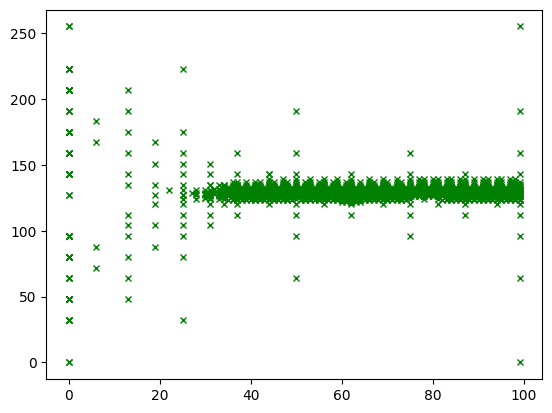

In [14]:
imgl = model.net(model.x_test_point).reshape(model.x.shape[0], model.t.shape[0])

iwt = torchIWT(j0, 7, 0.03).to(device)

_, idxs = iwt.get_Iwt2d(imgl, model.x, model.t)
idxn = []
for i in idxs:
    idxn = idxn + i
idxn = torch.tensor(idxn).to(device).float()
plt.plot(idxn[:, [1]].cpu().numpy(), idxn[:, [0]].cpu().numpy(), 'gx', markersize=4)